<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/Hybrid_Model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#> REMEMBER OF REGRESSION TAASK IN WINDOW ?https://www.youtube.com/watch?v=-ZrggvMf4i0

#instalações e importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf
import statsmodels.api as sm
import yfinance as yf
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM


#carregamento dos conjuntos

In [2]:
url_1 = "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/sunspot.csv"
sunpot_data = pd.read_csv(url_1)

url_2= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE//main/Datasets/US-UK.csv"
exchange_data= pd.read_csv(url_2)

url_3= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/lynx.csv"
lynx_data= pd.read_csv(url_3)

url_4= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/nikkei225.csv"
nikkei225_data= pd.read_csv(url_4)

#lynx
####the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934

In [3]:
#lynx
lynx_data.head()

,year,value
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [4]:
lynx_data.tail()

,year,value
109,1930,662
110,1931,1000
111,1932,1590
112,1933,2657
113,1934,3396


In [5]:
lynx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
print(lynx_data.index)
print(type(lynx_data.index))

RangeIndex(start=0, stop=114, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [7]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
lynx_data["year"] = pd.to_datetime(lynx_data["year"], format="%Y")

# Definir 'year' como índice
lynx_data.set_index("year", inplace=True)

# Se o índice for do tipo PeriodIndex, converta para Timestamp
if isinstance(lynx_data.index, pd.PeriodIndex):
    lynx_data.index = lynx_data.index.to_timestamp()


In [8]:

# Ordenar os dados por data (boa prática)
lynx_data=lynx_data.sort_index()

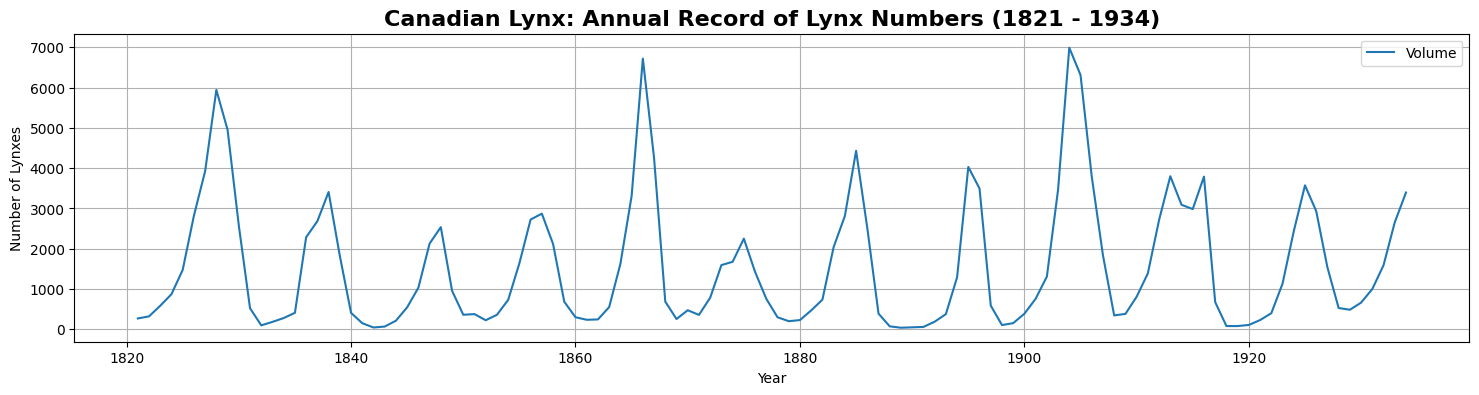

In [9]:
plt.figure(figsize=(18, 4))
plt.plot(lynx_data.index, lynx_data["value"], label='Volume') # Capitalized 'Volume' for consistency

plt.title("Canadian Lynx: Annual Record of Lynx Numbers (1821 - 1934)", fontsize=16, fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Lynxes") # More specific label
plt.grid(True)
plt.legend()
plt.show()

#sunpot
####The sunspot data considered in this paper include the annual number ofsunspot from 1700 to 1987

In [41]:
#sunpot
print("primeiros anos registrados")
sunpot_data.head()

primeiros anos registrados


,value
year,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [42]:
print("ultimos anos registrados")
sunpot_data.tail()

ultimos anos registrados


,value
year,
1984-01-01,45.9
1985-01-01,17.9
1986-01-01,13.4
1987-01-01,29.2
1988-01-01,100.2


In [43]:
sunpot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 1700-01-01 to 1988-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   289 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [44]:
print(sunpot_data.index)
print(type(sunpot_data.index))

DatetimeIndex(['1700-01-01', '1701-01-01', '1702-01-01', '1703-01-01',
               '1704-01-01', '1705-01-01', '1706-01-01', '1707-01-01',
               '1708-01-01', '1709-01-01',
               ...
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01'],
              dtype='datetime64[ns]', name='year', length=289, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [45]:
# Converter a coluna 'year' para datetime no formato de ano
sunpot_data["year"] = pd.to_datetime(sunpot_data["year"], format="%Y", errors='coerce')

# Definir 'year' como índice
sunpot_data.set_index("year", inplace=True)

# Garantir que o índice seja datetime (Timestamp), não Period
if isinstance(sunpot_data.index, pd.PeriodIndex):
    sunpot_data.index = sunpot_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
sunpot_data = sunpot_data.sort_index()


KeyError: 'year'

In [ ]:
plt.figure(figsize=(18, 4)) # Create the first figure
plt.plot(sunpot_data.index, sunpot_data["value"], label='Sunspot values') # Plot sunspot data

# Correct title for the sunspot plot
plt.title("Sunspot activity (1700 - 1988)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of sunspots") # Corrected label
plt.grid(True)
plt.legend()
plt.show() # Display the first plot


#exchange rate
####The exchange rate data set used in this paper contains weekly observations from 1980 to 1993

In [16]:
exchange_data.head()

,observation_date,DEXUSUK
0,1980-01-05,2.2370
1,1980-01-12,2.2570
2,1980-01-19,2.2855
3,1980-01-26,2.2610
4,1980-02-02,2.2740


In [17]:

exchange_data.tail()

,observation_date,DEXUSUK
725,1993-11-27,1.4795
726,1993-12-04,1.4900
727,1993-12-11,1.4945
728,1993-12-18,1.4910
729,1993-12-25,1.5030


In [18]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  730 non-null    object 
 1   DEXUSUK           730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [19]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#weekly observations from 1980 to 1993
exchange_data["observation_date"] = pd.to_datetime(exchange_data["observation_date"])
exchange_data.set_index("observation_date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(exchange_data.index, pd.PeriodIndex):
    exchange_data.index = exchange_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
exchange_data = exchange_data.sort_index()

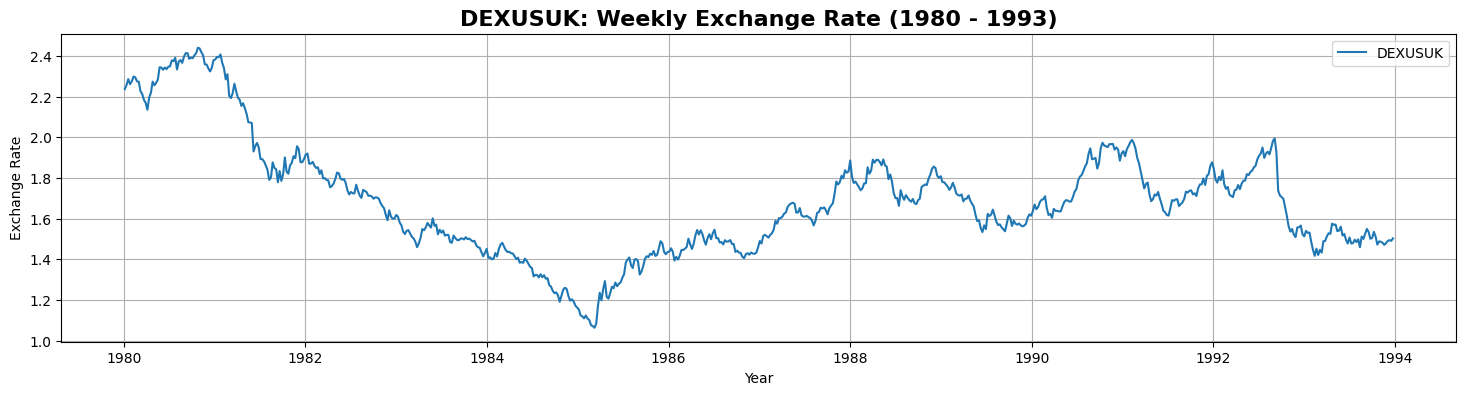

In [20]:
plt.figure(figsize=(18, 4))
plt.plot(exchange_data.index, exchange_data["DEXUSUK"], label='DEXUSUK') # Plot the actual data

plt.title("DEXUSUK: Weekly Exchange Rate (1980 - 1993)", fontsize=16, fontweight='bold') # Correct title placement
plt.xlabel("Year") # Appropriate label for time series
plt.ylabel("Exchange Rate") # Correct label for exchange rate
plt.grid(True)
plt.legend() # Show the label 'DEXUSUK'
plt.show()

#nikkie225
>
The closing Nikkei 225 index (N225) data set covers daily stock
prices from 2006/03/03 to 2010/04/01

In [22]:
nikkei225_data.tail()

,date,value
995,2010-03-26,10996.370117
996,2010-03-29,10986.469727
997,2010-03-30,11097.139648
998,2010-03-31,11089.940430
999,2010-04-01,11244.400391


In [23]:
nikkei225_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1000 non-null   object 
 1   value   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [24]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#2006/03/03 to 2009/06/05
nikkei225_data["date"] = pd.to_datetime(nikkei225_data["date"])
nikkei225_data.set_index("date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(nikkei225_data.index, pd.PeriodIndex):
    nikkei225_data.index = nikkei225_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
nikkei225_data =nikkei225_data.sort_index()

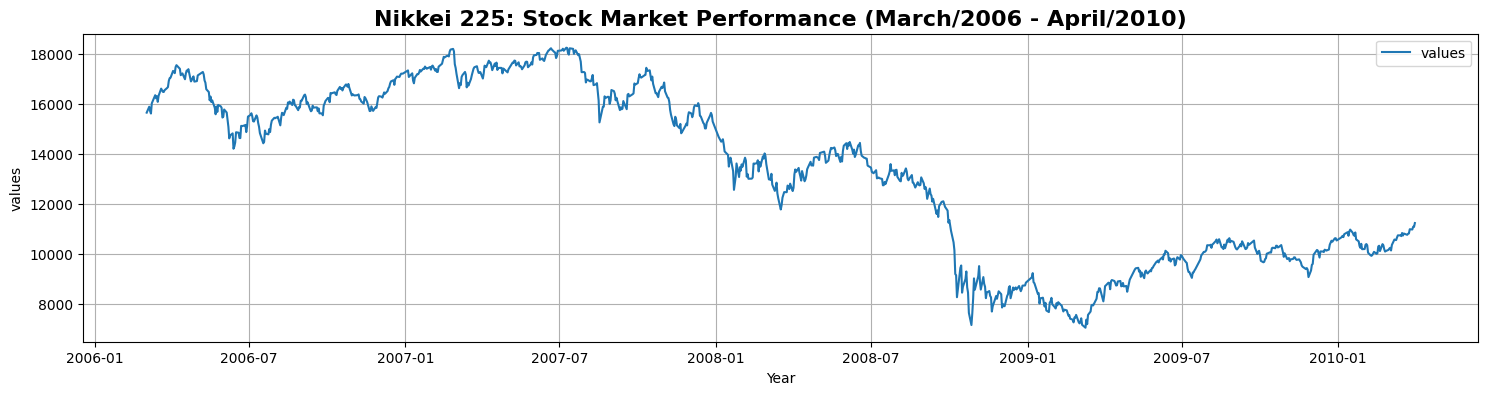

In [25]:
plt.figure(figsize=(18, 4))
plt.plot(nikkei225_data.index, nikkei225_data["value"], label='values')

# --- Here's the improved title setup ---
plt.title("Nikkei 225: Stock Market Performance (March/2006 - April/2010)", fontsize=16, fontweight='bold')
# --- End of improved title setup ---

plt.xlabel("Year") # Changed to "Ano" for Portuguese
plt.ylabel("values")
plt.grid(True)
plt.legend() # Don't forget to add legend if you have labels
plt.show()

#acf antes pacf

In [46]:
def gerar_graficos_temporais(df, titulo):
    import pandas as pd
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    import matplotlib.pyplot as plt

    col = df.columns[0]
    serie = df[col].dropna()


    # Inferência da frequência
    freq = pd.infer_freq(df.index)
    print(f"[INFO] Plotando série: {col} — Frequência inferida: {freq}")

    # Escolha inteligente de reamostragem
    if freq in ['D', 'B', 'W', None]:
        serie_agg = serie.resample('M').mean()
        agg_label = 'Média Mensal'
    elif freq in ['A', 'AS', 'Y']:
        serie_agg = serie.resample('2A').mean()
        agg_label = 'Média Bienal'
    elif freq in ['M', 'MS']:
        serie_agg = serie  # Já está em base mensal
        agg_label = 'Série Original (Mensal)'
    else:
        serie_agg = serie
        agg_label = 'Série Original'

    # Número seguro de defasagens
    lags = min(20, len(serie) // 2)

    # Gráficos
    plt.figure(figsize=(12, 10))

    # 1. Série original
    plt.subplot(4, 1, 1)
    plt.plot(serie, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 2. Série reamostrada
    plt.subplot(4, 1, 2)
    plt.plot(serie_agg, color='green')
    plt.title(f'{titulo} - {agg_label}')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 3. ACF
    plt.subplot(4, 1, 3)
    plot_acf(serie, lags=lags, ax=plt.gca())
    plt.title(f'{titulo} - Autocorrelação (ACF)')
    plt.grid(True)

    # 4. PACF
    plt.subplot(4, 1, 4)
    plot_pacf(serie, lags=lags, ax=plt.gca(), method='ywm')
    plt.title(f'{titulo} - Autocorrelação Parcial (PACF)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


#decomposição


📊 Performing Seasonal Decomposition for 'Exchange Rate' (Column: DEXUSUK, Period: 7)


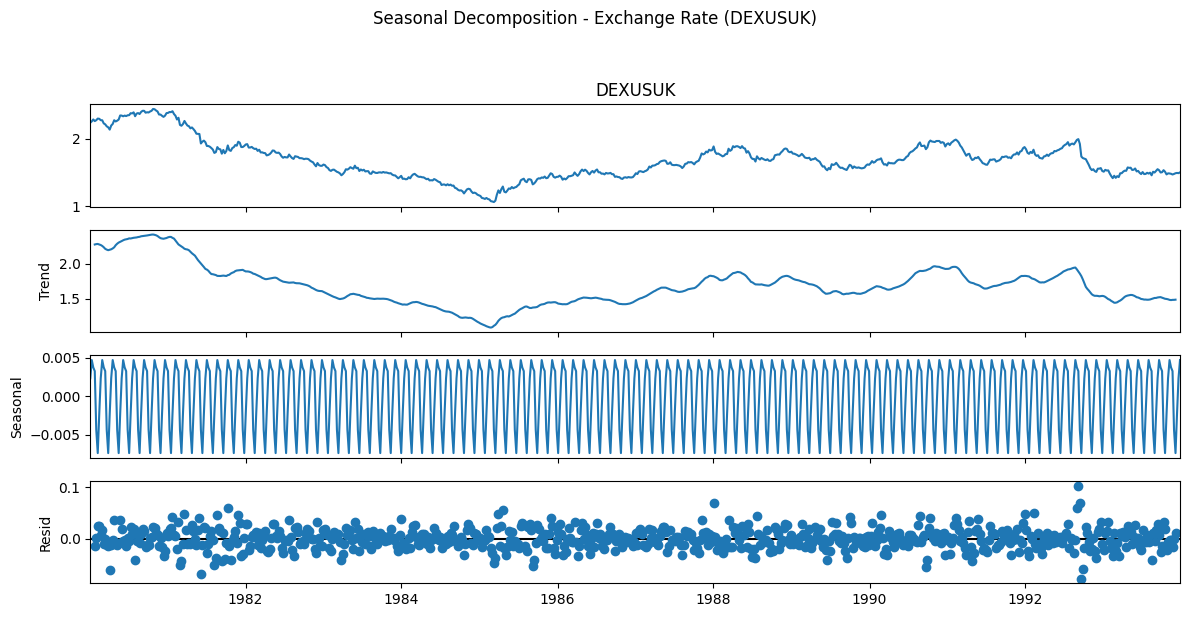


📊 Performing Seasonal Decomposition for 'Sunspot Activity' (Column: value, Period: 12)


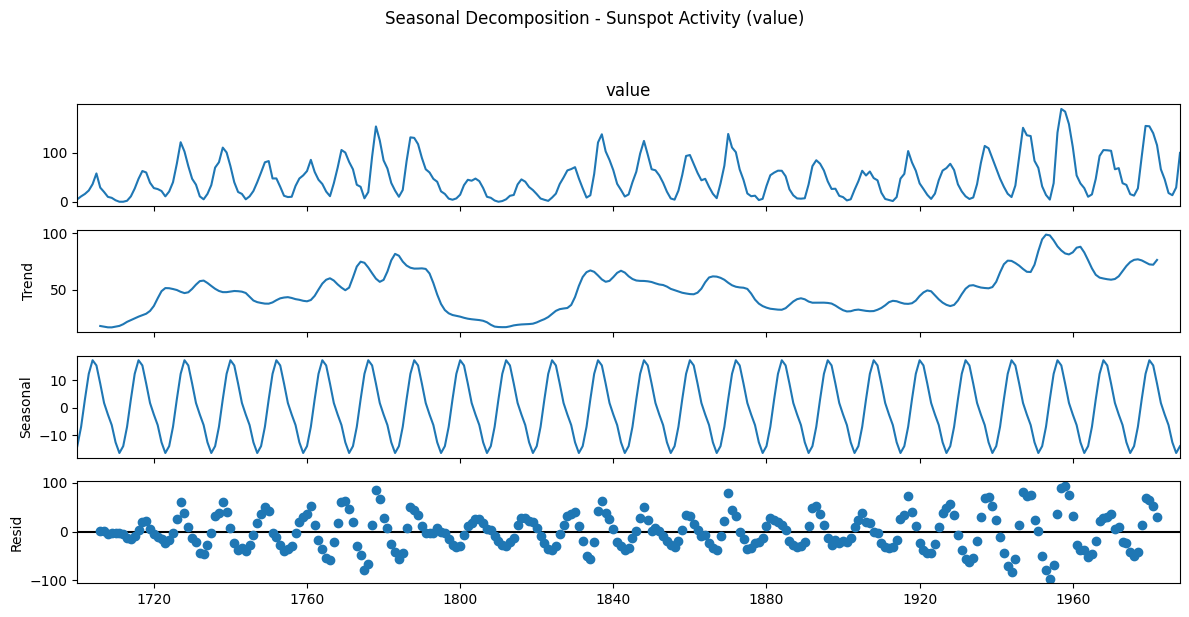


📊 Performing Seasonal Decomposition for 'Lynx Trappings' (Column: value, Period: 12)


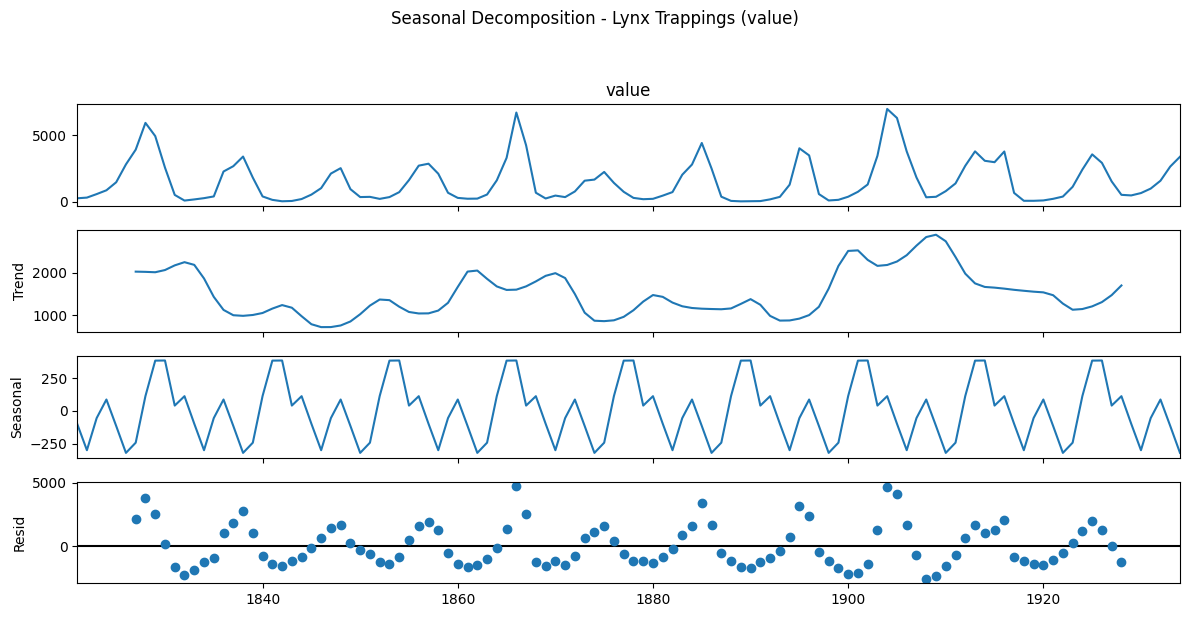


📊 Performing Seasonal Decomposition for 'Nikkei 225' (Column: value, Period: 365)


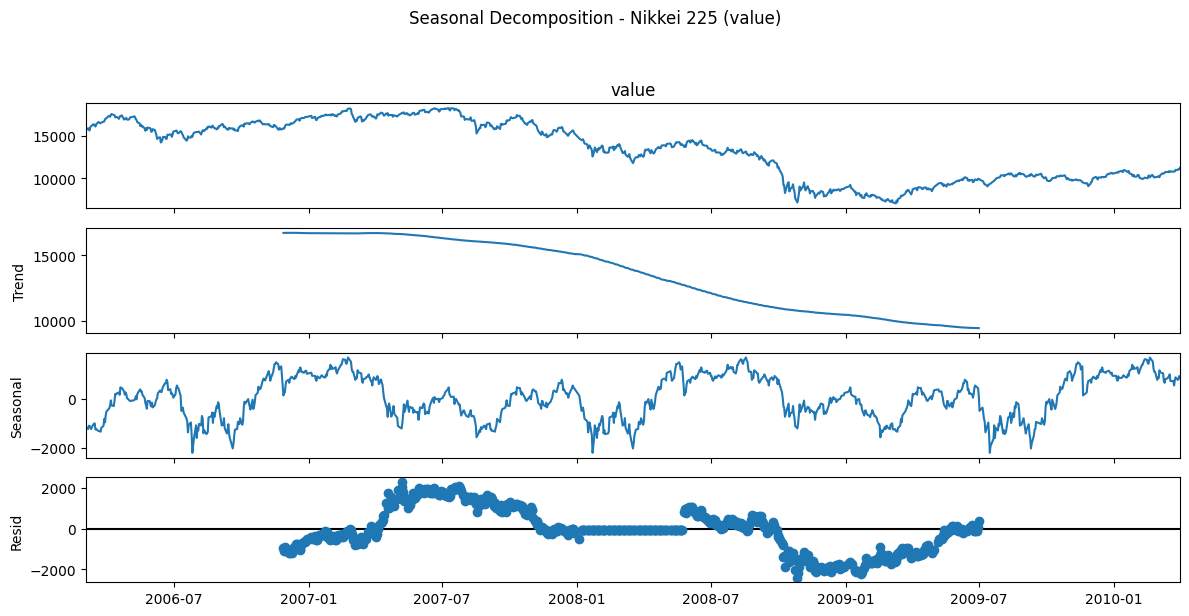

In [47]:
data_to_analyze = [
    # Weekly data, so a 7-day period (weekly cycle) is appropriate.
    {"name": "Exchange Rate", "df": exchange_data, "value_col": "DEXUSUK", "seasonal_period": 7},

    # Annual data. If looking for the ~11-year cycle, `seasonal_decompose` can use that.
    # If no "within-year" seasonality is expected, set to None.
    {"name": "Sunspot Activity", "df": sunpot_data, "value_col": "value", "seasonal_period": 12}, # Approx 11-year cycle

    # Annual data. Lynx cycles are around 9-10 years.
    # If no "within-year" seasonality is expected, set to None.
    {"name": "Lynx Trappings", "df": lynx_data, "value_col": "value", "seasonal_period": 12}, # Approx 9-year cycle

    # Daily data. Common periodicities are 5 (trading week), 7 (calendar week), or 365 (yearly).
    {"name": "Nikkei 225", "df": nikkei225_data, "value_col": "value", "seasonal_period": 365} # Trading week seasonality
]

# (Your `testar_season_decomp` function code remains the same as provided in your prompt)
def testar_season_decomp(data_configurations: list):
    """
    Performs seasonal decomposition for multiple time series and plots the components.

    Args:
        data_configurations (list): A list of dictionaries, where each dictionary should contain:
                                    - "name" (str): A descriptive name for the series.
                                    - "df" (pd.DataFrame): The DataFrame containing the time series.
                                    - "value_col" (str): The name of the column to analyze.
                                    - "seasonal_period" (int): The period of the seasonality
                                                               (e.g., 12 for monthly, 7 for weekly).
                                                               If None, decomposition is skipped for that series.
    """
    for config in data_configurations:
        name = config.get("name")
        df = config.get("df")
        value_col = config.get("value_col")
        period = config.get("seasonal_period")

        if not all([name, isinstance(df, pd.DataFrame), value_col]):
            print(f"Skipping invalid configuration: {config}. Missing name, DataFrame, or value_col.")
            continue

        if value_col not in df.columns:
            print(f"Error: Column '{value_col}' not found in DataFrame for '{name}'. Skipping.")
            continue

        serie = df[value_col].dropna()

        if period is None:
            print(f"\n🚫 Skipping seasonal decomposition for '{name}' (Column: {value_col}): No seasonal period specified.")
            continue

        # seasonal_decompose requires at least two full periods to work correctly
        if len(serie) < 2 * period:
            print(f"\n⚠️ Skipping seasonal decomposition for '{name}' (Column: {value_col}): Not enough data for period={period} (need at least {2*period} observations).")
            continue

        print(f"\n📊 Performing Seasonal Decomposition for '{name}' (Column: {value_col}, Period: {period})")

        try:
            # Model='additive' is suitable when seasonal fluctuations are roughly constant.
            # Model='multiplicative' is suitable when seasonal fluctuations grow/shrink with the level of the series.
            # Choose the model appropriate for your data.
            decomposicao = seasonal_decompose(serie, model='additive', period=period)

            # Plot the components
            fig = decomposicao.plot()
            fig.set_size_inches(12, 6) # Make the plot a bit larger for readability
            plt.suptitle(f"Seasonal Decomposition - {name} ({value_col})", y=1.02)
            plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
            plt.show()
        except Exception as e:
            print(f"An error occurred during decomposition for '{name}': {e}")

            # Define o nome do arquivo, combinando o nome da série e a coluna
            filename = f"decomposicao_{name.replace(' ', '_').replace('/', '_')}_{value_col}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo como: {filename}")



# --- Call the function with your data ---
if __name__ == "__main__":
    testar_season_decomp(data_configurations=data_to_analyze)

#estacionalidade para todo os conjuntos


In [48]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def tornar_estacionaria(df, nome="Série", max_diff=3):
    col_name = df.columns[0]
    current_serie = df[col_name].dropna().copy()
    differentiated_order = 0  # contador de quantas vezes foi diferenciada

    print(f"\n📊 Análise de Estacionaridade - {nome}")
    print(f"Coluna analisada: {col_name}")

    # --- Teste ADF na série original ---
    adf_result = adfuller(current_serie)
    print(f"\n🔍 Série Original:")
    print(f"  ADF Statistic: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4f}")
    print(f"  Valores Críticos: {adf_result[4]}")

    if adf_result[1] < 0.05:
        print("  ✅ A série é estacionária. Nenhuma diferenciação necessária.")
        return df.loc[current_serie.index]  # retorna a série original (sem diferenciação)

    print("  ❌ A série NÃO é estacionária. Tentando diferenciações...")

    # --- Diferenciação sucessiva ---
    for d in range(1, max_diff + 1):
        if len(current_serie) > 1:
            current_serie = current_serie.diff().dropna()
        else:
            print(f"  ⚠️ Série muito curta para diferenciar após {d-1} diferenciações.")
            break

        if len(current_serie) == 0:
            print(f"  ⚠️ Série vazia após {d} diferenciações. Não é possível testar.")
            break

        adf_diff = adfuller(current_serie)
        print(f"\n🔁 Série Diferenciada ({d}ª ordem):")
        print(f"  ADF Statistic: {adf_diff[0]:.4f}")
        print(f"  p-value: {adf_diff[1]:.4f}")
        print(f"  Valores Críticos: {adf_diff[4]}")

        if adf_diff[1] < 0.05:
            print(f"  ✅ A série diferenciada ({d}ª ordem) é estacionária.")
            differentiated_order = d
            break
        else:
            print(f"  ❌ Ainda NÃO é estacionária.")

    # --- Informativo final ---
    if differentiated_order > 0:
        print(f"✔️ A série '{nome}' foi diferenciada {differentiated_order} vez(es).")
    else:
        print(f"⚠️ A série '{nome}' NÃO estacionarizou após {max_diff} diferenciações.")

    # --- Retorna o DataFrame atualizado com a série transformada ---
    return pd.DataFrame({col_name: current_serie})


In [49]:
exchange_data_est = tornar_estacionaria(exchange_data, "Exchange Rate")
sunspot_data_est = tornar_estacionaria(sunpot_data, "Sunspot")
lynx_data_est = tornar_estacionaria(lynx_data, "Lynx Trappings")
nikkei_data_est = tornar_estacionaria(nikkei225_data, "Nikkei 225")



📊 Análise de Estacionaridade - Exchange Rate
Coluna analisada: DEXUSUK

🔍 Série Original:
  ADF Statistic: -1.9903
  p-value: 0.2908
  Valores Críticos: {'1%': np.float64(-3.4393520240470554), '5%': np.float64(-2.8655128165959236), '10%': np.float64(-2.5688855736949163)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (1ª ordem):
  ADF Statistic: -26.1380
  p-value: 0.0000
  Valores Críticos: {'1%': np.float64(-3.4393644334758475), '5%': np.float64(-2.8655182850048306), '10%': np.float64(-2.568888486973192)}
  ✅ A série diferenciada (1ª ordem) é estacionária.
✔️ A série 'Exchange Rate' foi diferenciada 1 vez(es).

📊 Análise de Estacionaridade - Sunspot
Coluna analisada: value

🔍 Série Original:
  ADF Statistic: -2.3842
  p-value: 0.1462
  Valores Críticos: {'1%': np.float64(-3.453922368485787), '5%': np.float64(-2.871918329081633), '10%': np.float64(-2.5723001147959184)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (

#treinamento

In [70]:
#as series passam a ter menos 1 ponto sendo observado durante o treinamento <ajustar depois>
#treinamento da serie já estacionaria
train_sunspot_data = sunspot_data_est.loc['1701':'1920']
train_lynx_data = lynx_data_est.loc['1821':'1920']
train_exchangerate_data=exchange_data_est.loc['1980':'1992'] #weekly
train_nikkie225_data=nikkei_data_est.loc['2006/03/06':'2009/06/05']

test_sunspot_data = sunspot_data_est.loc['1921':'1987']
test_lynx_data = lynx_data_est.loc['1921':'1934']
test_exchangerate_data=exchange_data_est.loc['1993']
test_nikkie225_data=nikkei_data_est.loc['2009/06/06':'2010/04/01']


#normalização

In [75]:
inter_min = 0
inter_max = 1

scaler_sunspot = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_lynx = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_exchangerate = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_nikkie225 = MinMaxScaler(feature_range=(inter_min, inter_max))

# Fit e transform no conjunto de treino
train_sunspot_data_normalized = scaler_sunspot.fit_transform(train_sunspot_data)
train_lynx_data_normalized = scaler_lynx.fit_transform(train_lynx_data)
train_exchangerate_data_normalized = scaler_exchangerate.fit_transform(train_exchangerate_data)
train_nikkie225_data_normalized  = scaler_nikkie225.fit_transform(train_nikkie225_data)

# Transform no conjunto de teste
test_sunspot_data_normalized = scaler_sunspot.transform(test_sunspot_data)
test_lynx_data_normalized = scaler_lynx.transform(test_lynx_data)
test_exchangerate_data_normalized = scaler_exchangerate.transform(test_exchangerate_data)
test_nikkie225_data_normalized = scaler_nikkie225.transform(test_nikkie225_data)

#coorelograma - acf e pacf apos por treinamento e


In [ ]:
#coorelograma
def acf_pacf(series, lags, figsize=(15, 6), title_prefix=""):
    """
    Gera gráficos de ACF (Autocorrelação) e PACF (Autocorrelação Parcial).

    Parâmetros:
    - series: Série temporal (array ou pandas Series).
    - lags: Número de lags (defasagens) para calcular as correlações.
    - figsize: Tamanho da figura (largura, altura).
    - title_prefix: Prefixo para os títulos dos gráficos (como o nome da coluna).
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # ACF
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title(f"{title_prefix} - ACF")

    # PACF
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title(f"{title_prefix} - PACF")

    # Ajustar layout
    plt.tight_layout()
    plt.show()

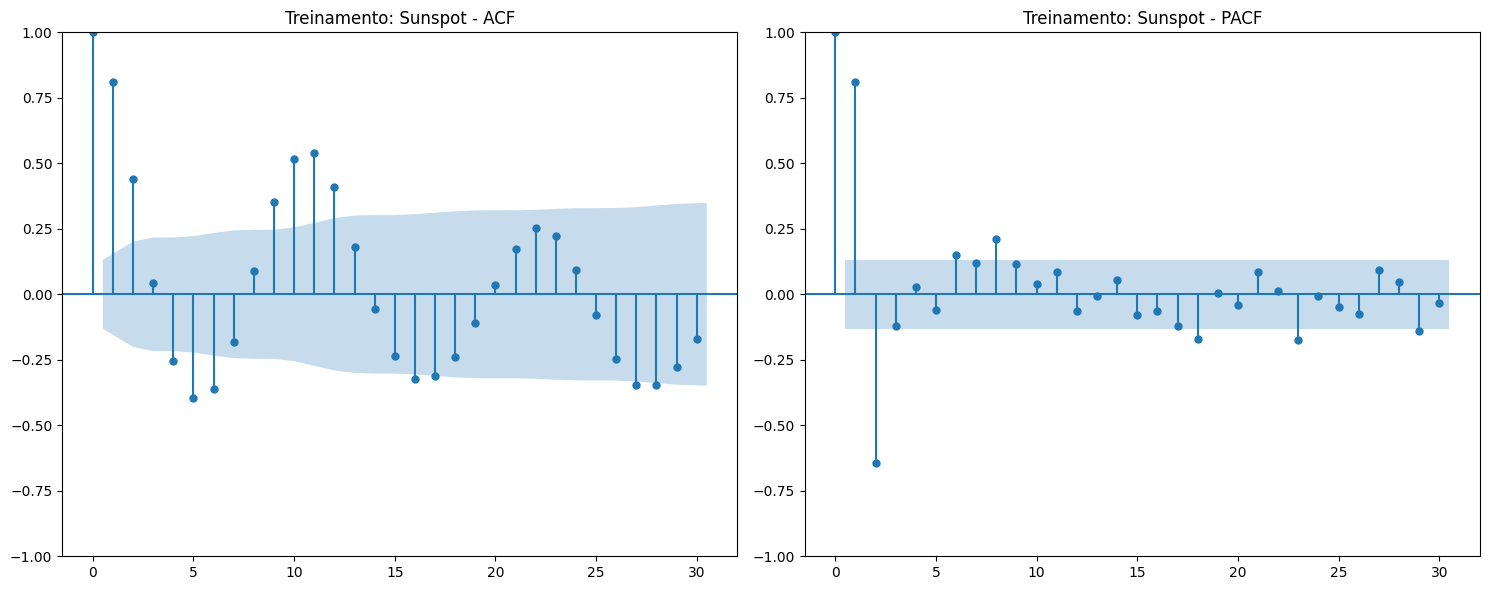

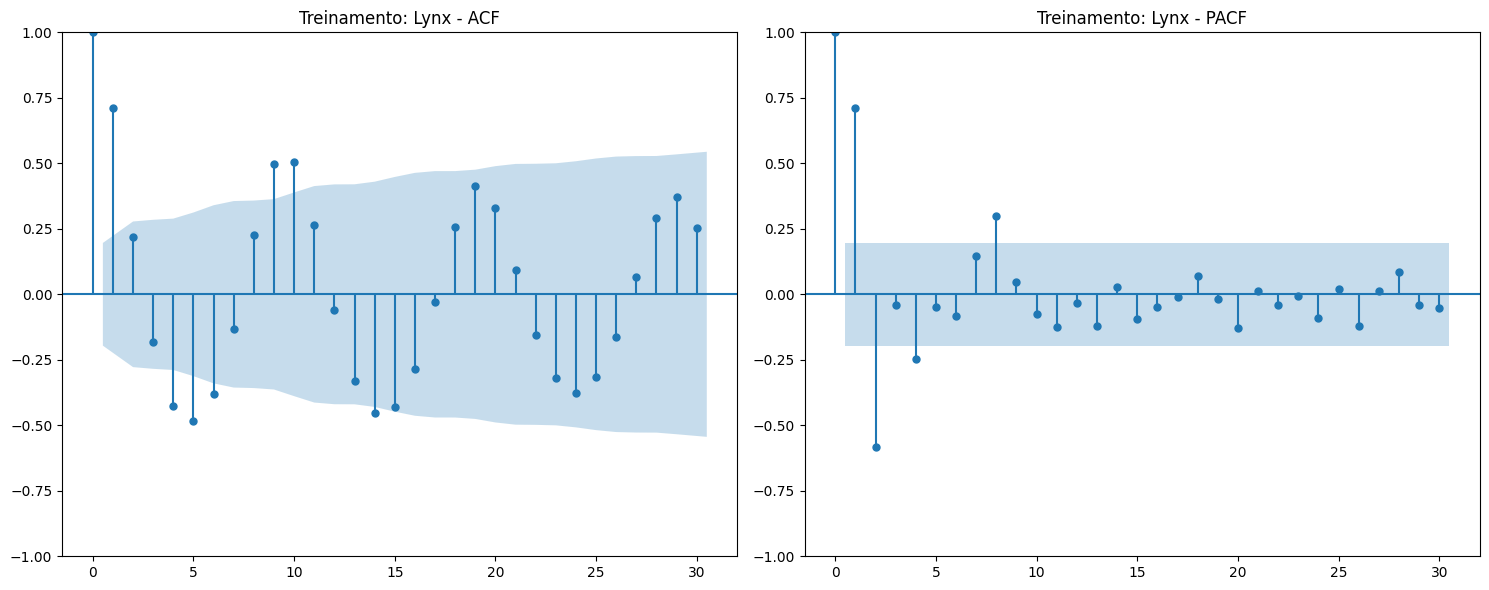

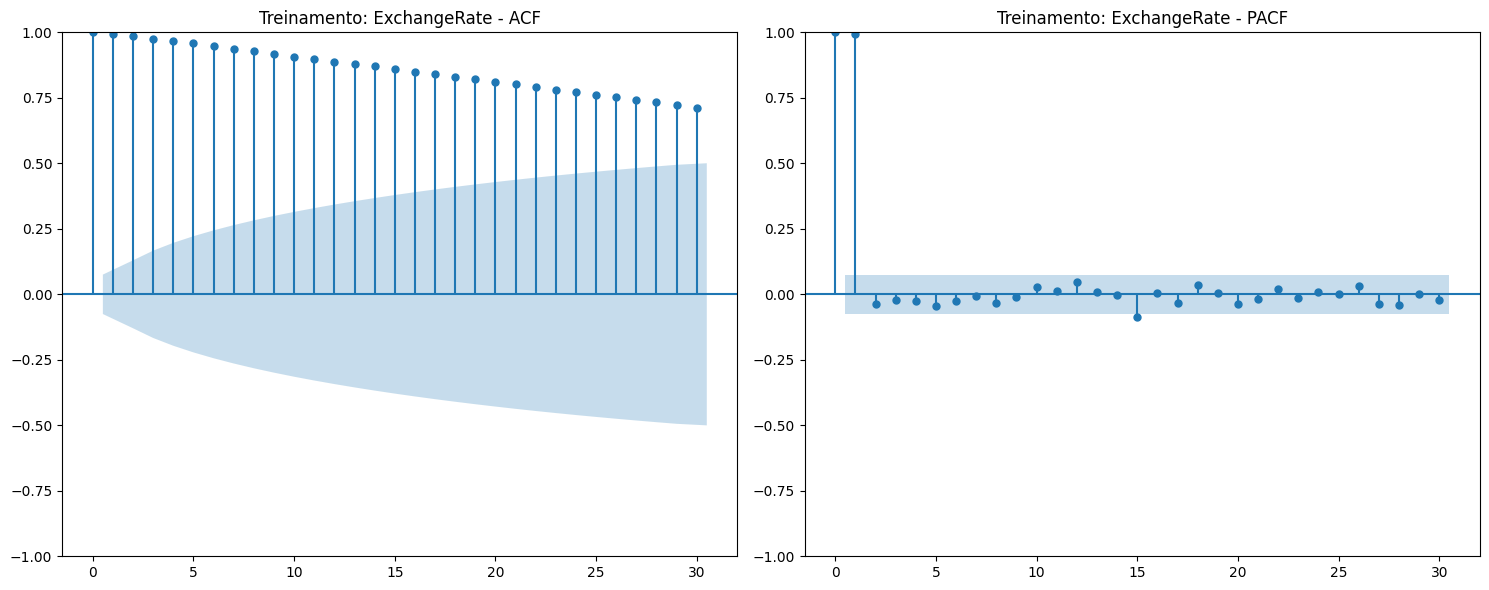

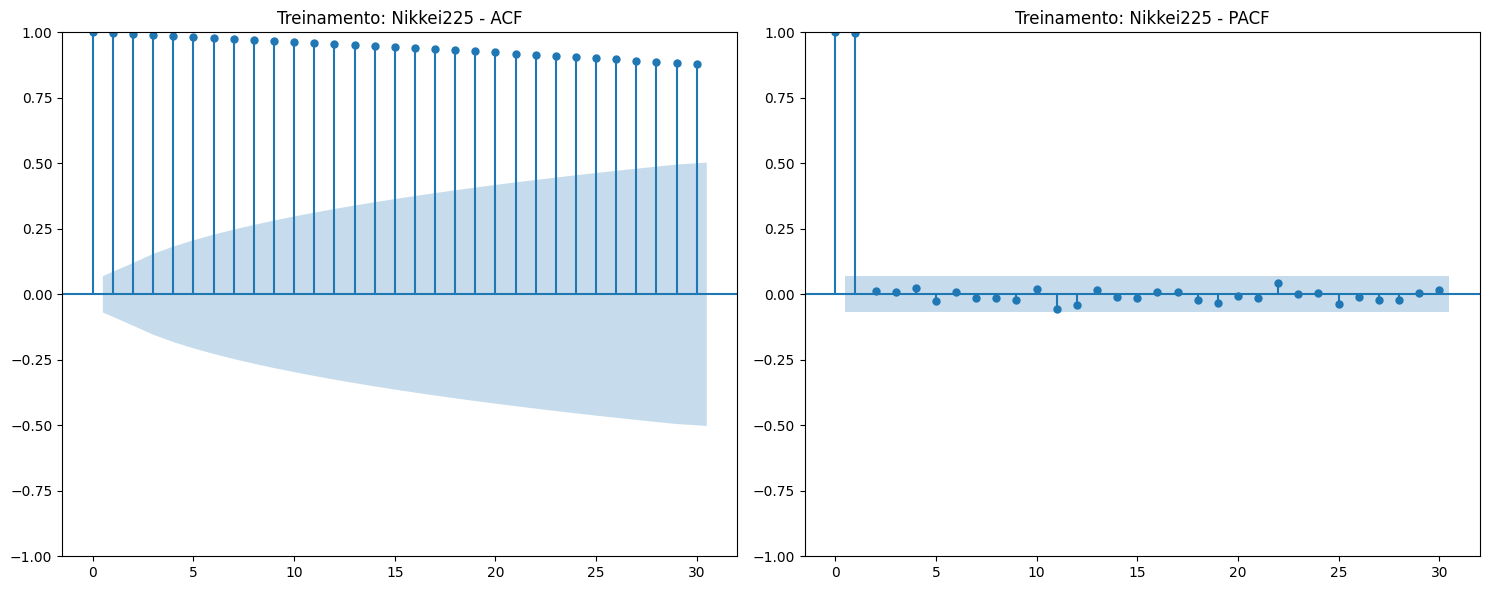

In [ ]:
train_sunpot_df = pd.DataFrame(train_sunpot_data_normalized, index=train_sunpot_data.index, columns=["Sunspot"])
train_lynx_df = pd.DataFrame(train_lynx_data_normalized, index=train_lynx_data.index, columns=["Lynx"])
train_exchangerate_df = pd.DataFrame(train_exchangerate_data_normalized, index=train_exchangerate_data.index, columns=["ExchangeRate"])
train_nikkie225_df = pd.DataFrame(train_nikkie225_data_normalized, index=train_nikkie225_data.index, columns=["Nikkei225"])
# Loop automático para qualquer nome de coluna
for df in [train_sunpot_df, train_lynx_df,
           train_exchangerate_df, train_nikkie225_df
           ]:
    for column in df.columns:
        acf_pacf(df[column], lags=30, title_prefix=f"Treinamento: {column}")


#sliding window - janelamento

In [ ]:
def create_sliding_windows(series, window_size):
    list_of_sliding_windows = []
    series_values = series.values if isinstance(series, pd.Series) else series

    if len(series_values) < window_size + 1:
        # Not enough data for even one window
        return np.empty((0, window_size + 1))

    # The number of possible windows
    list_size_to_iterate = len(series_values) - window_size

    for i in range(list_size_to_iterate):
        window = series_values[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows)

#Conjuntos para validação


In [ ]:

perc_val = 0.2  # 20% for validation
window_sizes = {
    "sunpot": 30,
    "lynx": 30,
    "exchangerate": 7,
    "nikkei225": 7,
}

#janelamento

In [ ]:

# --- Process each dataset ---
datasets_to_process = {
    "sunpot": {"train": train_sunpot_data, "test": test_sunpot_data},
    "lynx": {"train": train_lynx_data, "test": test_lynx_data},
    "exchangerate": {"train": train_exchangerate_data, "test": test_exchangerate_data},
    "nikkei225": {"train": train_nikkie225_data, "test": test_nikkie225_data},
}

processed_data = {} # To store the X_train, y_train, etc. for each dataset

for name, data_splits in datasets_to_process.items():
    train_data_paper = data_splits["train"]
    test_data_paper = data_splits["test"]
    window_size = window_sizes[name]

    print(f"\n--- Processing {name} ---")

    len_train_paper = len(train_data_paper)
    len_val = int(len_train_paper * perc_val)
    min_len_for_window = window_size + 1

    if len_train_paper < min_len_for_window:
        print(f"Error: Paper's training set for {name} is too short ({len_train_paper}) for window size {window_size}. Skipping.")
        continue

    if len_val < min_len_for_window:
        print(f"Warning: Calculated validation set for {name} is too short ({len_val}) for window size {window_size}. Validation will be skipped or very small.")
        actual_train_data = train_data_paper
        val_data = pd.Series()
    else:
        actual_train_data = train_data_paper.iloc[:-len_val]
        val_data = train_data_paper.iloc[-len_val:]

    print(f"Paper's Training Data Period: {train_data_paper.index.min()} to {train_data_paper.index.max()} (Length: {len(train_data_paper)})")
    print(f"Actual Training Data Period: {actual_train_data.index.min()} to {actual_train_data.index.max()} (Length: {len(actual_train_data)})")
    if not val_data.empty:
        print(f"Validation Data Period: {val_data.index.min()} to {val_data.index.max()} (Length: {len(val_data)})")
    else:
        print("Validation Data Period: (No valid data for validation slice)")
    print(f"Paper's Test Data Period: {test_data_paper.index.min()} to {test_data_paper.index.max()} (Length: {len(test_data_paper)})")


    windows_actual_train = create_sliding_windows(actual_train_data, window_size)
    windows_val = create_sliding_windows(val_data, window_size)
    windows_test_final = create_sliding_windows(test_data_paper, window_size)

    X_train, y_train = windows_actual_train[:, :-1], windows_actual_train[:, -1]
    X_val, y_val = windows_val[:, :-1], windows_val[:, -1] if windows_val.size > 0 else np.array([])
    X_test_final, y_test_final = windows_test_final[:, :-1], windows_test_final[:, -1]

    processed_data[name] = {
        "X_train": X_train, "y_train": y_train,
        "X_val": X_val, "y_val": y_val,
        "X_test": X_test_final, "y_test": y_test_final,
        "window_size": window_size
    }

    print(f"Windows actual train shape: {windows_actual_train.shape}")
    print(f"Windows validation shape: {windows_val.shape}")
    print(f"Windows test final shape: {windows_test_final.shape}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
    print(f"X_test_final shape: {X_test_final.shape}, y_test_final shape: {y_test_final.shape}")



--- Processing sunpot ---
Paper's Training Data Period: 1700-01-01 00:00:00 to 1920-01-01 00:00:00 (Length: 221)
Actual Training Data Period: 1700-01-01 00:00:00 to 1876-01-01 00:00:00 (Length: 177)
Validation Data Period: 1877-01-01 00:00:00 to 1920-01-01 00:00:00 (Length: 44)
Paper's Test Data Period: 1921-01-01 00:00:00 to 1987-01-01 00:00:00 (Length: 67)
Windows actual train shape: (147, 31, 1)
Windows validation shape: (14, 31, 1)
Windows test final shape: (37, 31, 1)
X_train shape: (147, 30, 1), y_train shape: (147, 1)
X_val shape: (14, 30, 1), y_val shape: (14, 1)
X_test_final shape: (37, 30, 1), y_test_final shape: (37, 1)

--- Processing lynx ---
Paper's Training Data Period: 1821-01-01 00:00:00 to 1920-01-01 00:00:00 (Length: 100)
Actual Training Data Period: 1821-01-01 00:00:00 to 1920-01-01 00:00:00 (Length: 100)
Validation Data Period: (No valid data for validation slice)
Paper's Test Data Period: 1921-01-01 00:00:00 to 1934-01-01 00:00:00 (Length: 14)
Windows actual trai


# SALVAR TODOS OS CONJUNTOS PROCESSADOS PARA CADA DATASET


In [ ]:
import os
# Definindo o diretório onde os arquivos serão salvos
output_dir = "processed_time_series_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório '{output_dir}' criado.")

print("\n--- Salvando todos os conjuntos processados para cada dataset ---")

for name, data_sets in processed_data.items():
    file_path = os.path.join(output_dir, f"{name}_sets.npz")
    np.savez_compressed(
        file_path,
        X_train=data_sets["X_train"],
        y_train=data_sets["y_train"],
        X_val=data_sets["X_val"],
        y_val=data_sets["y_val"],
        X_test=data_sets["X_test"],
        y_test=data_sets["y_test"]
    )
    print(f"'{name}_sets.npz' salvo com sucesso em '{output_dir}'.")

print("\nTodos os conjuntos foram salvos!")

#ver janelas

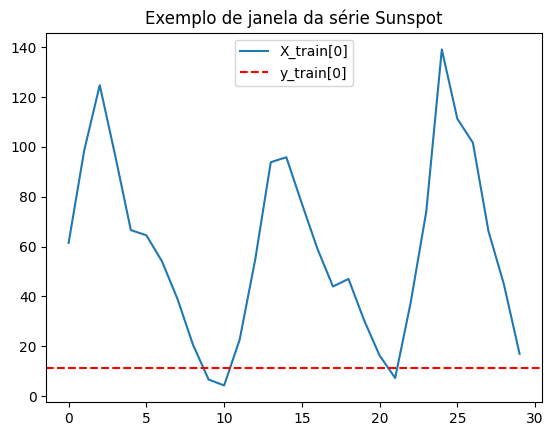

In [ ]:
import matplotlib.pyplot as plt

plt.plot(processed_data["sunpot"]["X_train"][-1], label="X_train[0]")
plt.axhline(processed_data["sunpot"]["y_train"][-1], color='red', linestyle='--', label="y_train[0]")
plt.legend()
plt.title("Exemplo de janela da série Sunspot")
plt.show()


Lag Plots

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)
plt.show()

#seleção de lag

In [ ]:
def select_lag_acf(serie, max_lag):
    from statsmodels.tsa.stattools import acf
    #x = serie[0: max_lag+1]

    acf_x, confint = acf(serie, nlags=max_lag, alpha=.05)

    limiar_superior = confint[:, 1] - acf_x
    limiar_inferior = confint[:, 0] - acf_x

    lags_selecionados = []

    for i in range(1, max_lag+1):


        if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
            lags_selecionados.append(i-1)  #-1 por conta que o lag 1 em python é o 0

    #caso nenhum lag seja selecionado, essa atividade de seleção para o grids earch encontrar a melhor combinação de lags
    if len(lags_selecionados)==0:

        print('NENHUM LAG POR ACF')
        lags_selecionados = [i for i in range(max_lag)]

    print('LAGS', lags_selecionados)

    #inverte o valor dos lags para usar na lista de dados
    lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]

    return lags_selecionados

In [ ]:
lags_chosen_pm10 = select_lag_acf(train_pm10, 30)

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[0,lags_chosen_pm10]

In [ ]:
#𝑦train contém os valores que o modelo deve prever.
y_train_pm10[0]

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[1,lags_chosen_pm10]

In [ ]:
#
y_train_pm10[1]

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[2,lags_chosen_pm10]

#arima model
>

A diferenciação (d no ARIMA) é o principal método para alcançar a estacionariedade quando há tendências ou sazonalidade estocástica. O teste de Dickey-Fuller Aumentado (ADF) é uma forma formal de verificar a necessidade de diferenciação (testa a presença de raiz unitária)

>  

as funções de autocorrelação (ACF) e autocorrelação parcial (PACF) são as ferramentas primárias para identificar as ordens (p, q, P, Q) de modelos ARMA/SARIMA após a série ser tornada estacionária




In [ ]:
def ajustar_ar(serie, p):
    """
    Ajusta um modelo AR(p) usando mínimos quadrados.
    """
    Y = serie[p:].values  # target
    X = np.column_stack([serie.shift(i).dropna().values[-len(Y):] for i in range(1, p+1)])

    # Adiciona intercepto (bias)
    X = np.column_stack([np.ones(len(Y)), X])

    # Estimativa por mínimos quadrados: φ = (XᵀX)⁻¹XᵀY
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ Y
    return coeficientes


In [ ]:
p = 2
phi = ajustar_ar(serie_diff, p)
print("Coeficientes AR:", phi)


In [ ]:
def prever_ar(serie, coeficientes, p):
    """
    Gera previsões com o modelo AR(p).
    """
    previsoes = []
    serie_vals = list(serie[-p:].values)

    for _ in range(10):  # exemplo: prever 10 passos à frente
        x = [1] + serie_vals[-p:]  # 1 para o bias
        pred = np.dot(coeficientes, x)
        previsoes.append(pred)
        serie_vals.append(pred)
    return previsoes


In [ ]:
last_real = exchange_data['DEXUSUK'].dropna().iloc[-1]  # último valor antes da previsão
previsoes_final = np.cumsum(prever_ar(serie_diff, phi, p)) + last_real


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(exchange_data.index[-50:], exchange_data['DEXUSUK'].iloc[-50:], label="Histórico real")
plt.plot(pd.date_range(exchange_data.index[-1], periods=10, freq='W'), previsoes_final, label="Previsão", color='orange')
plt.legend()
plt.title("Previsão Manual ARIMA(p,d,q)")
plt.grid(True)
plt.show()


In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

def grid_search_arima(serie, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in itertools.product(p_values, d_values, q_values):
        p, d, q = order
        try:
            model = ARIMA(serie, order=order)
            model_fit = model.fit()
            aic = model_fit.aic

            if aic < best_aic:
                best_aic = aic
                best_order = order
                best_model = model_fit

            print(f"Testando ARIMA{order} - AIC: {aic:.2f}")
        except:
            continue

    print(f"\nMelhor modelo ARIMA{best_order} com AIC: {best_aic:.2f}")
    return best_order, best_model


SVM

In [ ]:
#grid search
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

MLP

In [ ]:
params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}


LSTM

In [ ]:

#Number of units

#Dropout rate

#Batch size

#Learning rate

#Number of epochs

for units in [32, 64]:
    for dropout in [0.2, 0.5]:
        for lr in [0.001, 0.01]:
            # build and compile model with those params
            # train and evaluate


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

#MLP

In [ ]:

# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):

    neuronios = [5, 10,25]
    func_activation = [ 'tanh','logistic', 'relu']
    alg_treinamento = ['lbfgs', 'sgd', 'adam']

    max_iteracoes = [5000, 10000, 20000]  # Tente valores maiore
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    """para otimizar o código reduzindo os laços utilize o itertools:

    import itertools
    hyper_param = list(itertools.product(neuronios,func_activation,alg_treinamento,max_iteracoes, learning_rate))
    for i, j, l, m, n in hyper_param:

    """

    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):

                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)

                            mse = MSE(y_val, predict_validation)


                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                print('func: ', func_activation[j])





    return select_model

In [ ]:
modelo_PM10 =  treinar_mlp(X_train_acf_pm10, y_train_pm10, X_val_acf_pm10, y_val_pm10, 4)

In [ ]:
trainPredict_pm10 = modelo_PM10.predict(X_train_acf_pm10)

In [ ]:
plt.plot(trainPredict_pm10, label='Forecast')
plt.plot(y_train_pm10, label='target')
plt.legend()
plt.show()

In [ ]:
MSE(y_train_pm10,trainPredict_pm10 )

In [ ]:
#provavelmente o reshape que ira ser usado sera 0 e 1
predictRealInterval = scaler_pm10.inverse_transform(trainPredict_pm10.reshape(1, -1))


In [ ]:
targetRealInterval =  scaler_pm10 .inverse_transform(y_train_pm10.reshape(1, -1) )

In [ ]:

plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true )) * 100

In [ ]:
MSE(targetRealInterval,predictRealInterval)

In [ ]:
MAPE(targetRealInterval,predictRealInterval)

In [ ]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

#Após rodar ARIMA, LSTM, SVM, MLP, SVR etc., salve os resultados:

In [ ]:
import pandas as pd

def salvar_resultados(nome_modelo, y_real, y_previsto, residuos, caminho='resultados'):
    import os
    os.makedirs(caminho, exist_ok=True)

    df_resultado = pd.DataFrame({
        'y_real': y_real,
        'y_previsto': y_previsto,
        'residuo': residuos
    })
    df_resultado.to_csv(f"{caminho}/resultados_{nome_modelo}.csv", index=False)
    print(f"📁 Resultados salvos: {caminho}/resultados_{nome_modelo}.csv")


#o que deve ser feito de acordo com o que esta escrito no artigo selecionado

In [ ]:
#o que deve ser feito
"""
explicar como realizar o projeto descrito no artigo "Sequence in Hybridization of Statistical and Intelligent Models in Time Series Forecasting". O objetivo principal do projeto é comparar a performance de modelos híbridos de séries temporais, especificamente as abordagens sequenciais **Linear–Não Linear** e **Não Linear–Linear**, utilizando modelos estatísticos (ARIMA) e inteligentes (MLP/SVM).

O projeto envolve a implementação e avaliação de duas sequências principais de modelagem:

**1. Sequência Linear–Não Linear (Exemplo: ARIMA-MLP)**

Esta abordagem começa modelando a parte linear da série temporal e depois modela a parte não linear restante nos resíduos.

*   **Passo 1: Modelagem Linear (ARIMA) nos Dados Originais**
    *   **Entrada:** A série temporal original ("row data").
    *   **Objetivo:** Capturar e modelar os padrões lineares na série.
    *   **Processo:** Aplique o ciclo padrão de modelagem ARIMA:
        *   **Identificação:** Determine as ordens (p, d, q) do modelo ARIMA. Isso geralmente envolve primeiro tornar a série estacionária, tipicamente por **diferenciação** (`d` vezes). Ferramentas como o software ITSM podem ajudar na análise visual da série e na aplicação de transformações ou diferenciações. Use as funções de autocorrelação (ACF) e autocorrelação parcial (PACF) da série (diferenciada, se necessário) para sugerir os valores apropriados de p e q. O ITSM pode plotar ACF/PACF.
        *   **Estimação:** Estime os parâmetros (φ, θ, σ²) do modelo ARIMA(p, d, q) escolhido. A estimação por Máxima Verossimilhança (Maximum Likelihood Estimation - MLE) é um método comum. ITSM oferece opções para estimação preliminar (como Yule-Walker, Burg) e MLE, incluindo uma função Autofit que busca o modelo com menor critério AICC.
        *   **Verificação Diagnóstica:** Avalie a adequação do modelo ARIMA ajustado, principalmente analisando seus resíduos. Os resíduos devem se assemelhar a um ruído branco (série sem autocorrelação significativa). Embora o objetivo seja usar esses resíduos no próximo passo, verificar se o modelo linear é adequado ajuda a garantir que ele capturou a estrutura linear esperada.
    *   **Saída:** Um modelo ARIMA ajustado e a série de resíduos gerada por este modelo (`êARIMA,t`). Estes resíduos são considerados como contendo os padrões não lineares.

*   **Passo 2: Modelagem Não Linear (Exemplo: MLP) nos Resíduos do ARIMA**
    *   **Entrada:** Os resíduos (`êARIMA,t`) do modelo ARIMA ajustado no Passo 1.
    *   **Objetivo:** Modelar os padrões não lineares ou as relações remanescentes que o modelo ARIMA não conseguiu explicar.
    *   **Processo:** Ajuste um modelo não linear, como uma Rede Neural Artificial do tipo Multilayer Perceptron (MLP) ou uma Support Vector Machine (SVM), aos resíduos do ARIMA. No caso da MLP, os resíduos ARIMA servem como dados de entrada para o treinamento. A estrutura da MLP (número de camadas, neurônios, lags de entrada) deve ser determinada, frequentemente por um processo de otimização, testando diferentes topologias e escolhendo aquela que minimiza o erro (e.g., MSE) em dados de teste.
    *   **Saída:** Um modelo não linear treinado capaz de prever ou modelar os resíduos do ARIMA (`ĉ2`).

*   **Passo 3: Previsão Combinada**
    *   A previsão final (`f̂combined,t`) é obtida **somando a previsão do modelo ARIMA** (feita para a série original usando o modelo ajustado no Passo 1, referida como `ĉ1` na notação do artigo) **e a previsão do modelo não linear** (feita para os resíduos do ARIMA usando o modelo ajustado no Passo 2, referida como `ĉ2` na notação do artigo). Ou seja, `f̂combined,t = ĉ1 + ĉ2`.

**2. Sequência Não Linear–Linear (Exemplo: MLP-ARIMA)**

Esta abordagem inverte a ordem, primeiro modelando a parte não linear e depois a parte linear nos resíduos.

*   **Passo 1: Modelagem Não Linear (Exemplo: MLP) nos Dados Originais**
    *   **Entrada:** A série temporal original ("row data").
    *   **Objetivo:** Capturar e modelar os padrões não lineares na série primeiro.
    *   **Processo:** Ajuste um modelo não linear (MLP ou SVM) diretamente nos dados originais. Determine a estrutura ideal do modelo não linear.
    *   **Saída:** Um modelo não linear treinado e a série de resíduos gerada por este modelo (`êMLP,t`).

*   **Passo 2: Modelagem Linear (ARIMA) nos Resíduos do Modelo Não Linear**
    *   **Entrada:** Os resíduos (`êMLP,t`) do modelo não linear ajustado no Passo 1. Estes resíduos são considerados como contendo os padrões lineares não capturados pelo modelo não linear.
    *   **Objetivo:** Modelar os padrões lineares ou as relações remanescentes nos resíduos.
    *   **Processo:** Aplique o ciclo padrão de modelagem ARIMA (Identificação, Estimação, Verificação Diagnóstica) aos resíduos do modelo não linear (`êMLP,t`). Isso inclui a diferenciação dos resíduos, se necessário, para atingir a estacionariedade antes de identificar e estimar o modelo ARMA para os resíduos.
    *   **Saída:** Um modelo ARIMA ajustado para os resíduos do modelo não linear.

*   **Passo 3: Previsão Combinada**
    *   A previsão final é obtida **somando a previsão do modelo não linear** (feita para a série original usando o modelo ajustado no Passo 1, referida como `ĉ2` nesta sequência) **e a previsão do modelo ARIMA** (feita para os resíduos do modelo não linear usando o modelo ajustado no Passo 2, referida como `ĉ1` nesta sequência). A fórmula combinada é `f̂combined,t = ĉ1 + ĉ2`.

**Avaliação e Comparação**

Após implementar ambas as sequências e obter as previsões combinadas para um conjunto de dados de teste, compare a performance usando métricas de erro como MSE, MAE e MAPE, bem como a correlação entre valores reais e previstos. O artigo sugere que a sequência Não Linear–Linear (MLP-ARIMA ou SVM-ARIMA) tende a produzir resultados mais precisos.

Em suma, o projeto envolve a aplicação sequencial de um modelo linear e um modelo não linear, em duas ordens diferentes, usando os resíduos da primeira etapa como entrada para a segunda. A implementação de cada modelo (ARIMA, MLP, SVM) segue os procedimentos padrão (como identificação, estimação e verificação para ARIMA), adaptados para a entrada específica (dados originais ou resíduos) em cada passo da sequência híbrida.
"""

#Escrever o artigo no overleaf ⁉[overleaf_artigo](https://pt.overleaf.com/9677853253txwnpcyrdcmg#ce7095)

#ajuda ajuda alguem me ajuda

In [ ]:
# Referências para Modelagem de Séries Temporais

#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
#https://www.tylervigen.com/spurious-correlations

#https://www.ibm.com/br-pt/think/topics/autocorrelation
#https://www.linkedin.com/pulse/como-realizar-uma-an%C3%A1lise-de-correla%C3%A7%C3%A3o-em-s%C3%A9ries-r-oliveira-batista/





## ARIMA / SARIMA

- [GitHub: ARIMA model time series prediction (Python)](https://github.com/liannewriting/YouTube-videos-public/tree/main/arima-model-time-series-prediction-python)
- [YouTube: ARIMA Time Series Tutorial](https://www.youtube.com/watch?v=Rl_tMSc_wKo)
- [Medium: Time Series Forecasting with ARIMA, SARIMA and SARIMAX](https://medium.com/data-science/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6)
- [Towards Data Science: Understanding ARIMA Time Series Modeling](https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8/)
- [Towards Data Science: Time Series Forecasting using Auto-ARIMA in Python](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)
- [Medium: Estimating ARIMA and SARIMA coefficients using Genetic Algorithm](https://medium.com/@mouse3mic3/estimating-arima-and-sarima-coefficients-using-genetic-algorithm-03f24ab66589)
- [Kaggle Discussions: ARIMA Questions and Answers](https://www.kaggle.com/discussions/questions-and-answers/199346)
- [DataCamp Tutorial: ARIMA](https://www.datacamp.com/tutorial/arima)
- [Medium: ARIMA Model from Scratch in Python](https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce)

## Artigos Científicos e Modelos Híbridos

- [arXiv Paper (2025): Time Series Forecasting with Large Language Models](https://arxiv.org/pdf/2504.08940)
- [Neurocomputing Paper: Hybrid Forecasting Models](https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf)
- [GitHub: Additive Hybrid Model with MLP](https://github.com/domingos108/hybrid_system_forecast/blob/master/additive_hybrid_model_mlp.ipynb)

## Séries Temporais e Pandas

- [Towards Data Science: Introducing Time Series in Pandas (Parte 1)](https://towardsdatascience.com/introducing-time-series-in-pandas-09c7cab569b4/)
- [Pandas Docs: Time Series Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

## Redes Neurais para Séries Temporais (MLP, LSTM, GRU)

- [Towards Data Science: Neural Network MLP for Time Series Forecasting in Practice](https://towardsdatascience.com/neural-network-mlp-for-time-series-forecasting-in-practice-04c47c1e3711/)
- [Towards Data Science: Exploring the LSTM Neural Network Model for Time Series](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf/)
- [Gabe Nosek: Time Series Stock Prediction with LSTM](https://gabenosek.medium.com/time-series-stock-prediction-with-lstm-eb04f2224c22)
- [Medium: Time Series Prediction with LSTM, Bi-LSTM, GRU](https://medium.com/data-science-data-engineering/time-series-prediction-lstm-bi-lstm-gru-99334fc16d75)
- [Towards Data Science: Time Series ARIMA vs SARIMA vs LSTM - Hands-on Tutorial](https://towardsdatascience.com/time-series-arima-vs-sarima-vs-lstm-hands-on-tutorial-bd5630298da3/)
- [Towards Data Science: Hands-on Neural Networks and Time Series with Python](https://towardsdatascience.com/hands-on-neural-networks-and-time-series-with-python-a61d7d75f3d9/)
- [Medium (Português): Introdução às Redes LSTM - Prevendo valor de ações na bolsa](https://medium.com/datarisk-io/introdu%C3%A7%C3%A3o-%C3%A0s-redes-lstm-prevendo-valor-de-a%C3%A7%C3%B5es-na-bolsa-df270ca0cee5)
- [Towards Data Science: LSTM Framework for Univariate Time Series Prediction](https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e/)
- [Mario Filho: Como prever séries temporais com LSTM em Python (tutorial em Português)](https://mariofilho.com/como-prever-series-temporais-com-lstm-em-python/)
- [Medium: Understanding LSTMs - LSTM Implementation from Scratch](https://medium.com/@samina.amin/understanding-lstms-lstm-implementation-from-scratch-18965a150eca)
- [Medium: Building a Neural Network Zoo from Scratch - The Long Short-Term Memory Network](https://medium.com/@CallMeTwitch/building-a-neural-network-zoo-from-scratch-the-long-short-term-memory-network-1cec5cf31b7)
- [Kaggle: LSTM Neural Network from Scratch](https://www.kaggle.com/code/navjindervirdee/lstm-neural-network-from-scratch)

## Técnicas Auxiliares e Outros Temas em Séries Temporais

- [Towards Data Science: Fourier Transform for Time Series Plotting & Complex Numbers](https://towardsdatascience.com/fourier-transform-for-time-series-plotting-complex-numbers-9743ffe8a8bb/)
- [Towards Data Science: 3 Common Time Series Modeling Mistakes You Should Know](https://towardsdatascience.com/3-common-time-series-modeling-mistakes-you-should-know-a126df24256f/)
